# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [168]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 263


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [169]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kudahuvadhoo
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | pandan
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | kani keli
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | lichinga
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | rizhao
Processing Record 22 of Set 1 | mogocha
P

In [148]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          607
Lat           607
Lng           607
Max Temp      607
Humidity      607
Cloudiness    607
Wind Speed    607
Country       607
Date          607
dtype: int64

In [149]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,40.89,86,100,4.94,CL,1699847640
1,iqaluit,63.7506,-68.5145,-2.31,77,20,5.75,CA,1699847562
2,palmer,42.1584,-72.3287,31.51,74,0,3.44,US,1699847714
3,al ghayzah,16.2079,52.1760,78.91,70,1,2.06,YE,1699847679
4,nawabganj,24.5911,88.2710,80.33,46,1,6.71,BD,1699847921


In [150]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [151]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,40.89,86,100,4.94,CL,1699847640
1,iqaluit,63.7506,-68.5145,-2.31,77,20,5.75,CA,1699847562
2,palmer,42.1584,-72.3287,31.51,74,0,3.44,US,1699847714
3,al ghayzah,16.2079,52.1760,78.91,70,1,2.06,YE,1699847679
4,nawabganj,24.5911,88.2710,80.33,46,1,6.71,BD,1699847921


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

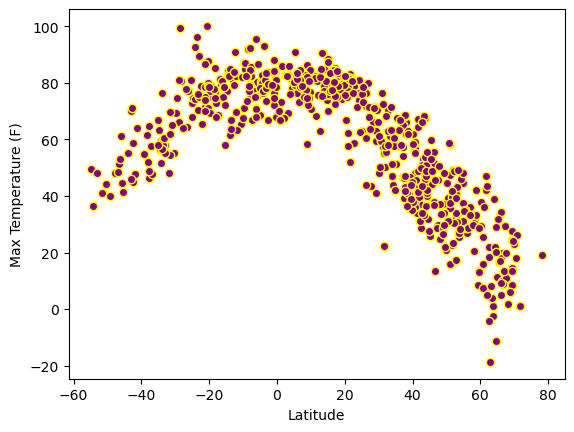

In [152]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, edgecolor="yellow", color="purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/latvtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

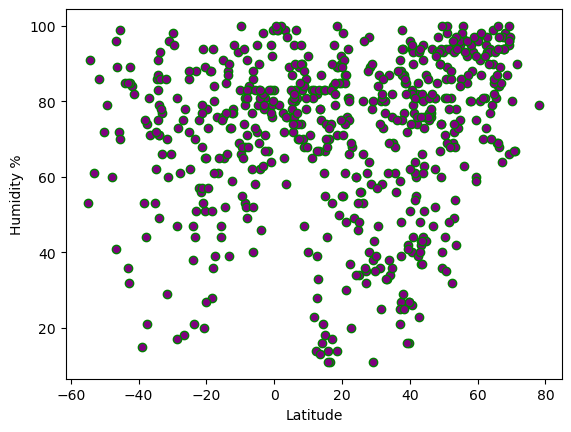

In [153]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y, edgecolor="green", color="purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("output_data/latvhumid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

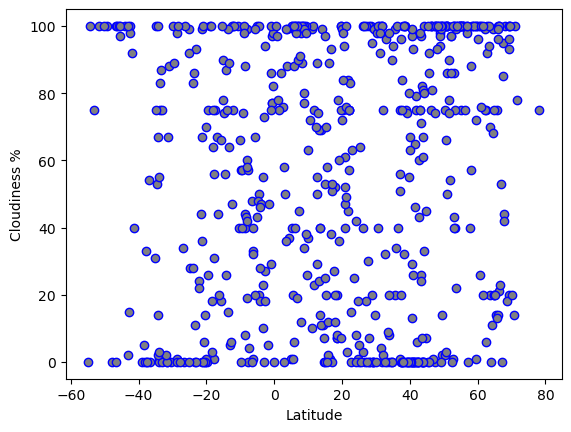

In [154]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, edgecolor="blue", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("output_data/latvcloudy.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

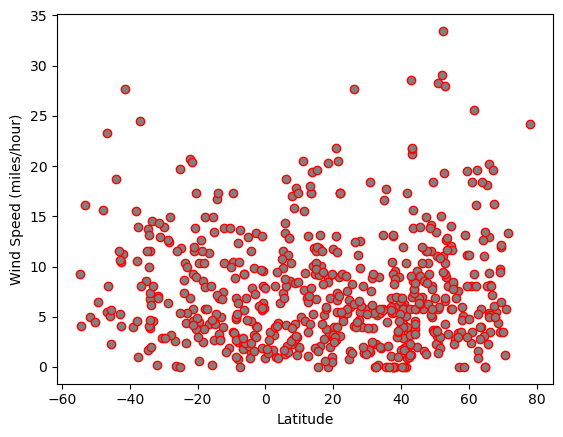

In [155]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y, edgecolor="red", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (miles/hour)")

# Save the figure
plt.savefig("output_data/latvwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: -0.0005255881812949781.


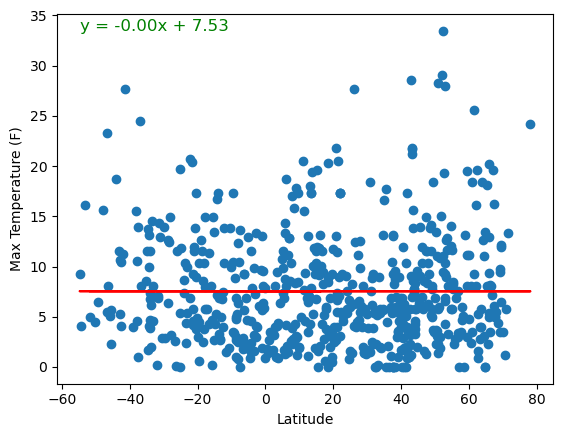

In [156]:
# Define a function to create Linear Regression plots

def Regression_scatter(weatherdata, xCol, yCol):
    x = weatherdata[xCol]
    y = weatherdata[yCol]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x), max(y), line_eq, color="green", fontsize=12)
print(f"The r-value is: {rvalue}.")

plt.plot(x, slope * x + intercept, color="red", label=f'regression line: y = {slope:.2f}x + {intercept:.2f}')
plt.scatter(x, y)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)

plt.show()

In [157]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-2.31,77,20,5.75,CA,1699847562
2,palmer,42.1584,-72.3287,31.51,74,0,3.44,US,1699847714
3,al ghayzah,16.2079,52.1760,78.91,70,1,2.06,YE,1699847679
4,nawabganj,24.5911,88.2710,80.33,46,1,6.71,BD,1699847921
5,okhotsk,59.3833,143.3000,8.35,75,1,19.51,RU,1699847638


In [158]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df["Lat"] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,40.89,86,100,4.94,CL,1699847640
8,papatowai,-46.5619,169.4708,51.42,96,100,5.50,NZ,1699847643
11,port-aux-francais,-49.3500,70.2167,39.99,79,100,6.49,TF,1699847634
13,grytviken,-54.2811,-36.5092,36.30,91,100,4.12,GS,1699847552
14,pariaman,-0.6190,100.1200,84.25,76,77,6.33,ID,1699847875


###  Temperature vs. Latitude Linear Regression Plot

In [159]:
# Linear regression on Northern Hemisphere
Regression_scatter(northern_hemi_df, "Max Temp", "Lat")
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.0005255881812949781.


In [160]:
# Linear regression on Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Max Temp")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.0005255881812949781.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [161]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.0005255881812949781


In [162]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Humidity")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.0005255881812949781


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [163]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Cloudiness")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.0005255881812949781


In [164]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Cloudiness")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.0005255881812949781


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [165]:
# Northern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Wind Speed")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.0005255881812949781.


In [166]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Wind Speed")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.0005255881812949781.


**Discussion about the linear relationship:** YOUR RESPONSE HERE